# Proyek Pertama: Membuat Model NLP dengan Tensorflow
*Nama: Handhika Yanuar Pratama*

---

Proyek ini dikerjakan untuk memenuhi pembelajaran akademi dicoding 'Belajar Pengembangan Machine Learning'. Tujuan akhir dari proyek ini yaitu menerapkan pengetahuan dari bab Natural Language Processing (NLP) dengan tensorflow

## 0. Import module utama

In [ ]:
# Module utama dalam pemrosesan NLP
import tensorflow as tf

# Module untuk pemrosesan dan visualisasi data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Module untuk membantu proses penyatuan file
import glob
import os

## 1. Tujuan

Tujuan proyek ini yaitu menentukan tema dari berita yang diterbitkan pada website resmi Pemprov DKI Jakarta pada tahun 2020. Dataset ini sepenuhnya diperoleh dari [Jakarta Open Data](https://data.jakarta.go.id/dataset/data-judul-berita-yang-di-publish-pada-website-berita-resmi-pemprov-dki-jakarta-tahun-2020) yang kemudian disatukan


## 2. Hipotesis

Hipotesis yang saya gunakan adalah: Judul memiliki pengaruh pada kategori berita



*Catatan*: Notebook ini merupakan notebook kedua untuk pengerjaan model ini. Pada model sebelumnya, nilai val_accuracy maksimal hanya berada pada rentang 55-57%

![picture](https://drive.google.com/uc?id=12-uArtSRp5bvHgcrhU7YH2kNDHXyyEzs)

Pada model tersebut jelas terjadi overfitting yang besar, karena saya mencoba mengkategorikan 14 kategori dari dataset dengan jumlah bersih 4669. Untuk itu pada model ini saya mencoba menyatukan kelas yang memiliki kemiripan untuk mengecilkan ukuran kategori dan mengajukan hipotesis kedua sebagai berikut

---
Hipotesis II: Judul memiliki pengaruh pada kategori berita, dengan syarat kategori data harus lebih spesifik apabila data yang digunakan kecil

## 3. Pengumpulan Data

### A. Pengumpulan data

Pada tahap ini dilakukan pengumpulan data, disini saya mengunduh semua data dari sumbernya yang terdiri dari 12 file

In [ ]:
!unzip berita_2020.zip

Archive:  berita_2020.zip
   creating: berita/
  inflating: berita/Data-Judul-Berita-Bulan-Agustus-Tahun-2020.csv  
  inflating: berita/Data-Judul-Berita-Bulan-April-Tahun-2020.csv  
  inflating: berita/Data-Judul-Berita-Bulan-Desember-Tahun-2020.csv  
  inflating: berita/Data-Judul-Berita-Bulan-Februari-Tahun-2020.csv  
  inflating: berita/Data-Judul-Berita-Bulan-Januari-Tahun-2020.csv  
  inflating: berita/Data-Judul-Berita-Bulan-Juli-Tahun-2020.csv  
  inflating: berita/Data-Judul-Berita-Bulan-Juni-Tahun-2020.csv  
  inflating: berita/Data-Judul-Berita-Bulan-Maret-Tahun-2020.csv  
  inflating: berita/Data-Judul-Berita-Bulan-Mei-Tahun-2020.csv  
  inflating: berita/Data-Judul-Berita-Bulan-November-Tahun-2020.csv  
  inflating: berita/Data-Judul-Berita-Bulan-Oktober-Tahun-2020.csv  
  inflating: berita/Data-Judul-Berita-Bulan-September-Tahun-2020.csv  


In [ ]:
!ls

berita	berita_2020.zip  sample_data


### B. Penyatuan Data

Dataset terdiri dari 12 file yang dipisahkan bulan untuk itu perlu dilakukan penyatuan dari setiap file, disini langsung saya satukan menjadi sebuah dataframe

In [ ]:
path ='berita'
all_files = glob.glob(os.path.join(path, "*.csv")) # Memilih semua file csv

In [ ]:
df_each_file = (pd.read_csv(f) for f in all_files)
df_all = pd.concat(df_each_file, ignore_index=True)

In [ ]:
df_all

,judul_berita,tanggal_publikasi,jam_publikasi,kategori
0,Kolaborasi dengan Ojek Online dan Pedagang Pas...,2020-03-31,20:40,Ekonomi
1,Sejumlah Ruas Jalan di Jakpus Disemprot Disinf...,2020-03-31,18:26,Kesehatan
2,Sudin Pertamanan dan Hutan Kota Jakbar Terima ...,2020-03-31,17:45,Kesehatan
3,Ruas Jalan di Tanah Sereal Disemprot Disinfektan,2020-03-31,17:24,Jakarta Hari Ini
4,Jakgrosir Pasar Kedoya Mulai Beroperasi,2020-03-31,17:00,BUMD
...,...,...,...,...
9002,Satgas SDA Bangun Saluran Air di Kelurahan Gedong,2020-11-01,12:03,Jakarta Hari Ini
9003,Kebakaran Rumah di Angke Berhasil Dipadamkan,2020-11-01,11:51,Jakarta Hari Ini
9004,"Jakarta Raih STA 2021, Transjakarta Terus Kemb...",2020-11-01,11:14,BUMD
9005,17 Unit Mobil Pemadam Atasi Kebakaran di Pekayon,2020-11-01,08:27,Jakarta Hari Ini


### C. Memahami Data
Pada tahap ini dicari karakteristik dari data, tujuannya untuk lebih mengenali data

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9007 entries, 0 to 9006
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   judul_berita       9007 non-null   object
 1   tanggal_publikasi  9007 non-null   object
 2   jam_publikasi      9007 non-null   object
 3   kategori           9007 non-null   object
dtypes: object(4)
memory usage: 281.6+ KB


Dari output diatas diketahui data terdiri dari 9007 baris dan 4 buah kolom, setiap kolom bertipe object, dimana tidak ada nilai null dari data tersebut

### D. Menyeleksi Data

Penseleksian data bertujuan untuk meringkas dataframe sehingga lebih fokus pada tujuan. Tujuan saya untuk mengetahui kategori berita berdasarkan judul berita

In [ ]:
df = df_all.drop(['tanggal_publikasi', 'jam_publikasi'], axis=1)

In [ ]:
df.head()

,judul_berita,kategori
0,Kolaborasi dengan Ojek Online dan Pedagang Pas...,Ekonomi
1,Sejumlah Ruas Jalan di Jakpus Disemprot Disinf...,Kesehatan
2,Sudin Pertamanan dan Hutan Kota Jakbar Terima ...,Kesehatan
3,Ruas Jalan di Tanah Sereal Disemprot Disinfektan,Jakarta Hari Ini
4,Jakgrosir Pasar Kedoya Mulai Beroperasi,BUMD


### Pengolahan Data

Tidak semua data penting, dan terkadang terdapat data yang membuat model machine learning berkurang kemampuan pendeteksiannya. Untuk itu sebelum pembuatan model perlu dilakukan pengolahan data

In [ ]:
df.kategori.value_counts()

Jakarta Hari Ini          2630
Lintas Kota               1459
Kesra                      940
Kesehatan                  816
BUMD                       628
Pembangunan                343
Pemerintahan               338
Ekonomi                    329
Legislatif                 303
Banjir                     302
Fokus                      225
Transportasi               166
Pendidikan                 132
Wisata & Kuliner           121
Seni & Budaya              107
Pemberdayaan Perempuan      77
Olahraga                    67
LENGGANG JAKARTA            15
Warga  Bicara                3
Jakarta in Spotlight         2
LINTAS KOTA                  2
HUT DKI ke 476               1
Info Humas                   1
Name: kategori, dtype: int64

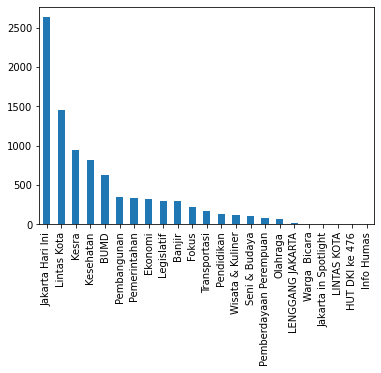

In [ ]:
df.kategori.value_counts().plot(kind='bar')

Melihat dari jenis kategori terdapat ketidakseimbangan data, selain itu juga terdapat tema yang tidak umum (khusus masyarakat Jakarta saja). Untuk itu, dilakukan penghilangan data yang tidak membantu dalam proses pengkategorian model nantinya

In [ ]:
df.columns

Index(['judul_berita', 'kategori'], dtype='object')

Perlu dicatat bahwa data yang dihilangkan terletak pada row dan bukan columns, jadi karena masih dengan keterbatasan ilmu, saya melakukan pengdropan data secara manual

In [ ]:
# Melakukan pengkelasan kategori yang hendak dihilangkan
index_names1 = df[(df['kategori'] == 'Jakarta in Spotlight')].index
index_names2 = df[(df['kategori'] == 'Jakarta Hari Ini')].index
index_names3 = df[(df['kategori'] == 'LENGGANG JAKARTA')].index
index_names4 = df[(df['kategori'] == 'HUT DKI ke 476')].index
index_names5 = df[(df['kategori'] == 'Warga  Bicara')].index
index_names6 = df[(df['kategori'] == 'LINTAS KOTA')].index
index_names7 = df[(df['kategori'] == 'Lintas Kota')].index
index_names8 = df[(df['kategori'] == 'Info Humas')].index
index_names9 = df[(df['kategori'] == 'Fokus')].index

In [ ]:
# dz = df.copy()
# df = dz.copy() # backup df

In [ ]:
# Menghapus kategori yang tidak digunakan
df = df.drop(index_names1)
df = df.drop(index_names2)
df = df.drop(index_names3)
df = df.drop(index_names4)
df = df.drop(index_names5)
df = df.drop(index_names6)
df = df.drop(index_names7)
df = df.drop(index_names8)
df = df.drop(index_names9)

Berikut hasil kategori setelah didrop

In [ ]:
df.kategori.value_counts()

Kesra                     940
Kesehatan                 816
BUMD                      628
Pembangunan               343
Pemerintahan              338
Ekonomi                   329
Legislatif                303
Banjir                    302
Transportasi              166
Pendidikan                132
Wisata & Kuliner          121
Seni & Budaya             107
Pemberdayaan Perempuan     77
Olahraga                   67
Name: kategori, dtype: int64

Pada percobaan sebelumnya saya mengalami kegagalan terutama pada bagian val_akurasi yang stagnan pada rentang 0.55-0.57 untuk itu pada bagian ini dilakukan penyempitan data supaya lebih kecil cakupannya

Untuk itu berikut klasifikasi yang dilakukan

* Kesejahteraan: 
    - Kesra
    - Pemberdayaan Perempuan
    - Pendidikan  
    - Ekonomi
    - Kesehatan
    - Transportasi

* Pemerintah & Pembangunan:
    - BUMD 
    - Pemerintah
    - Legislatif
    - Pembangunan

* Lainnya:
    - Banjir
    - Wisata & Kuliner 
    - Seni & Budaya
    - Olahraga

Dasar Pengelompokan di atas saya mengacu pada paper [BERITA UTAMA  DI SURAT KABAR ](http://eprints.upnjatim.ac.id/2794/3/3._Berita_UtamaJawa_Pos_Herlina.pdf) tetapi karena pada paper tersebut belum terlalu spesifik dan adanya keterbatasan data, maka saya menambahkan pendekatan berdasarkan kemiripan (Pribadi). Tujuanya untuk membuat klasifikasi tiga kategori. 

In [ ]:
# dfy = df.copy()
# df = dfy.copy() # backup df

In [ ]:
# Kesejahteraan
df.replace("Kesra", "Kesejahteraan", inplace=True)
df.replace("Pemberdayaan Perempuan", "Kesejahteraan", inplace=True)
df.replace("Kesehatan", "Kesejahteraan", inplace=True)
df.replace("Pendidikan", "Kesejahteraan", inplace=True)
df.replace("Ekonomi", "Kesejahteraan", inplace=True)
df.replace("Transportasi", "Kesejahteraan", inplace=True)

# Pemerintah & Pembangunan
df.replace("BUMD", "Pemerintahan & Pembangunan", inplace=True)
df.replace("Pemerintahan", "Pemerintahan & Pembangunan", inplace=True)
df.replace("Legislatif", "Pemerintahan & Pembangunan", inplace=True)
df.replace("Pembangunan", "Pemerintahan & Pembangunan", inplace=True)

# Masyarakat
df.replace("Banjir", "Masyarakat", inplace=True)
df.replace("Wisata & Kuliner", "Masyarakat", inplace=True)
df.replace("Seni & Budaya", "Masyarakat", inplace=True)
df.replace("Olahraga", "Masyarakat", inplace=True)

In [ ]:
df

,judul_berita,kategori
0,Kolaborasi dengan Ojek Online dan Pedagang Pas...,Kesejahteraan
1,Sejumlah Ruas Jalan di Jakpus Disemprot Disinf...,Kesejahteraan
2,Sudin Pertamanan dan Hutan Kota Jakbar Terima ...,Kesejahteraan
4,Jakgrosir Pasar Kedoya Mulai Beroperasi,Pemerintahan & Pembangunan
5,Dinas PPAPP Sosialisasikan Perlindungan Peremp...,Kesejahteraan
...,...,...
8988,Pengalihan Rute Transjakarta Diperluas,Pemerintahan & Pembangunan
8989,Transjakarta Rute Blok M - Kota Dialihkan,Pemerintahan & Pembangunan
8994,STA 2021 Jadi Pemacu MRT untuk Lebih Baik,Pemerintahan & Pembangunan
9000,"Listrik Padam, Operasional MRT Tetap Normal",Pemerintahan & Pembangunan


Terlihat bahwa, data yang terlalu spesifik sudah hilang, mari kita lihat distribusi

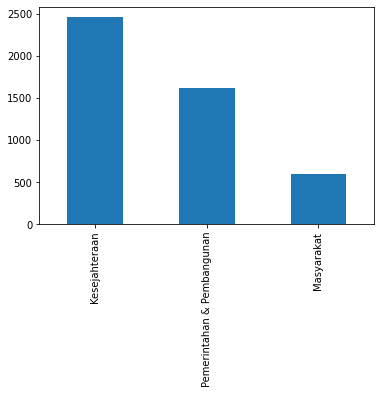

In [ ]:
df.kategori.value_counts().plot(kind='bar')

Distribusi data cukup baik, namun seperti yang diketahui kemungkinan model tidak dapat digunakan untuk dijadikan acuan penelitian, melainkan hanya untuk pengetahuan klasifikasi tiga kategori saja

In [ ]:
df.head()

,judul_berita,kategori
0,Kolaborasi dengan Ojek Online dan Pedagang Pas...,Kesejahteraan
1,Sejumlah Ruas Jalan di Jakpus Disemprot Disinf...,Kesejahteraan
2,Sudin Pertamanan dan Hutan Kota Jakbar Terima ...,Kesejahteraan
4,Jakgrosir Pasar Kedoya Mulai Beroperasi,Pemerintahan & Pembangunan
5,Dinas PPAPP Sosialisasikan Perlindungan Peremp...,Kesejahteraan


Data tersebut berhasil di olah tetapi index data tidak beraturan untuk itu perlu diperbaiki dengan fungsi reset_index

In [ ]:
df.reset_index(drop=True, inplace=True)
df.head()

,judul_berita,kategori
0,Kolaborasi dengan Ojek Online dan Pedagang Pas...,Kesejahteraan
1,Sejumlah Ruas Jalan di Jakpus Disemprot Disinf...,Kesejahteraan
2,Sudin Pertamanan dan Hutan Kota Jakbar Terima ...,Kesejahteraan
3,Jakgrosir Pasar Kedoya Mulai Beroperasi,Pemerintahan & Pembangunan
4,Dinas PPAPP Sosialisasikan Perlindungan Peremp...,Kesejahteraan


Pada tahap ini data telah berhasil diolah, maka sudah siap menuju tahap berikutnya, tetapi saya melakukan backup terlebih dahulu dengan menyimpan dataframe menjadi csv, tujuannya sebagai backup

In [ ]:
df.to_csv('berita_clean_2.csv', index=False)

## 4. Pembuatan Model

* Tujuan    : V
* Hipotesis : V
* Tema      : V

Pada tahapan ini dilakukan pembuatan model NLP untuk memprediksi kategori berdasarkan judul berita

In [ ]:
df

,judul_berita,kategori
0,Kolaborasi dengan Ojek Online dan Pedagang Pas...,Kesejahteraan
1,Sejumlah Ruas Jalan di Jakpus Disemprot Disinf...,Kesejahteraan
2,Sudin Pertamanan dan Hutan Kota Jakbar Terima ...,Kesejahteraan
3,Jakgrosir Pasar Kedoya Mulai Beroperasi,Pemerintahan & Pembangunan
4,Dinas PPAPP Sosialisasikan Perlindungan Peremp...,Kesejahteraan
...,...,...
4664,Pengalihan Rute Transjakarta Diperluas,Pemerintahan & Pembangunan
4665,Transjakarta Rute Blok M - Kota Dialihkan,Pemerintahan & Pembangunan
4666,STA 2021 Jadi Pemacu MRT untuk Lebih Baik,Pemerintahan & Pembangunan
4667,"Listrik Padam, Operasional MRT Tetap Normal",Pemerintahan & Pembangunan


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4669 entries, 0 to 4668
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   judul_berita  4669 non-null   object
 1   kategori      4669 non-null   object
dtypes: object(2)
memory usage: 73.1+ KB


In [ ]:
df.kategori.value_counts()

Kesejahteraan                 2460
Pemerintahan & Pembangunan    1612
Masyarakat                     597
Name: kategori, dtype: int64

### A. One Hot Encoding

Tipe data yang hendak saya olah berupa kategorikal, untuk itu dilakukan proses one-hot-encoding supaya model dapat memproses data

In [ ]:
category = pd.get_dummies(df.kategori)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='kategori')
df_new.head()

,judul_berita,Kesejahteraan,Masyarakat,Pemerintahan & Pembangunan
0,Kolaborasi dengan Ojek Online dan Pedagang Pas...,1,0,0
1,Sejumlah Ruas Jalan di Jakpus Disemprot Disinf...,1,0,0
2,Sudin Pertamanan dan Hutan Kota Jakbar Terima ...,1,0,0
3,Jakgrosir Pasar Kedoya Mulai Beroperasi,0,0,1
4,Dinas PPAPP Sosialisasikan Perlindungan Peremp...,1,0,0


### B. Pemisahan Features

Setelah dilakukan one hot encoding, langkah selanjutnya adalah mengubah nilai dari dataframe ke dalam tipe data numpy array menggunakan attribut values

In [ ]:
judul = df_new['judul_berita'].values
target = df_new.iloc[:, 1:4].values

### C. Split Data

Pada bagian ini dilakukan pemisahan untuk data training dan data testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(judul, target, test_size=0.2)

### D. Tokenisasi Data

Pada bagian ini dilakukan tokenisasi, supaya model dapat mengolah setiap data teks menjadi numerik

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=15000, oov_token='x')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

X_train_sequence = tokenizer.texts_to_sequences(X_train)
X_test_sequence = tokenizer.texts_to_sequences(X_test)

### E. Padding Data

Tokenisasi telah dilakukan padadata, tetapi panjang dari data tidak seimbang, untuk menyeimbangkan dilakukkan padding

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_padded = pad_sequences(X_train_sequence)
X_test_padded = pad_sequences(X_test_sequence)

In [ ]:
len(X_train_padded[1])

20

### F. Embedding + LSTM

Pada tahap ini dilakukan penyusunan arsitektur menggunakan layer Embedding ditambah dengan LSTM

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
          tf.keras.layers.Embedding(input_dim=15000, output_dim=20),
          # tf.keras.layers.Flatten(),
          tf.keras.layers.LSTM(100, dropout=0.5),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dropout(0.2),
          # tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(3, activation='softmax')
        ])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 20)          300000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               48400     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                6464      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 355,059
Trainable params: 355,059
Non-trainable params: 0
_________________________________________________________________


### G. Callbacks

Callbacks berguna untuk menghemat waktu training, ketika model telah mencapai target yang ingin dicapai

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.85):
      print("\nValidasi Akurasi telah mencapai > 85%")
      self.model.stop_training = True

callbacks= myCallback()

### H. Training

Saatnya eksekusi

In [ ]:
epoch=50
history = model.fit(X_train_padded, y_train, epochs=epoch,
                    validation_data=(X_test_padded, y_test),
                    batch_size=16, callbacks=[callbacks],
                    verbose=2)

Epoch 1/50
234/234 - 7s - loss: 0.9163 - accuracy: 0.5724 - val_loss: 0.6405 - val_accuracy: 0.7281
Epoch 2/50
234/234 - 4s - loss: 0.5153 - accuracy: 0.8029 - val_loss: 0.4613 - val_accuracy: 0.8276
Epoch 3/50
234/234 - 4s - loss: 0.3182 - accuracy: 0.8932 - val_loss: 0.4245 - val_accuracy: 0.8480
Epoch 4/50
234/234 - 4s - loss: 0.2324 - accuracy: 0.9226 - val_loss: 0.4199 - val_accuracy: 0.8512

Validasi Akurasi telah mencapai > 85%


## 5. Analisa Hasil + Kesimpulan
Pada tahap ini saya melakukan plotting pada variable history yang berisikan proses belajar dari model menggunakan arsitektur dari Embedding dan LSTM

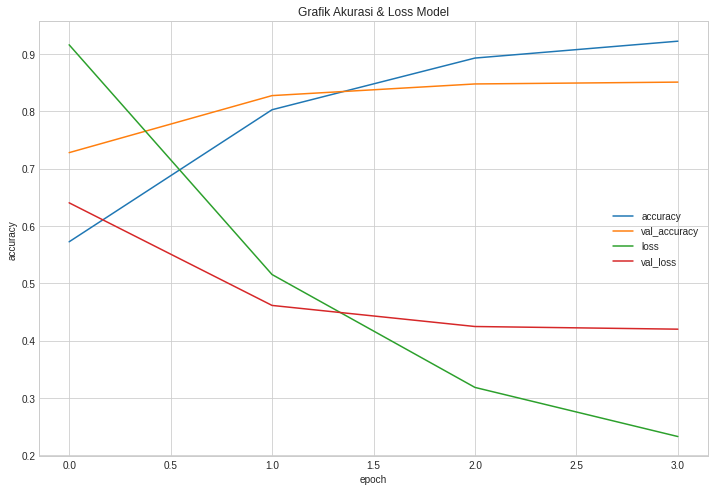

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Grafik Akurasi & Loss Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy', 'loss', 'val_loss'], loc='right')
plt.show()

Berdasarkan grafik yang ditampilkan di atas dapat terlihat bahwa
1. Nilai akurasi model mencapai angka > 90% 
2. Nilai val_accuracy model mencapai angka > 85%
3. Nilai loss model mencapai angka < 30%(tepatnya 23%) 
4. Nilai val_loss model mencapai angka < 50% (tepatnya 42%)

**Kesimpulan** 

Setelah kategori berita disatukan menjadi hanya 3 kelas dari 14 kelas, hasil nilai akurasi dan validasi akurasi cukup berdekatan, artinya overfitting dapat teratasi (meskipun belum sempurna). Hal yang paling terlihat yaitu, terjadi peningkatan validasi akurasi sebanyak 30%. **Terakhir, dapat disimpulkan bahwa  judul berita memiliki pengaruh pada kategori berita.**

## Keterangan



---


Alasan, kenapa model ini belum dapat mencapai nilai 90%, masih belum terpecahkan oleh saya pribadi, tetapi berikut asumsi saya:
1. Data yang digunakan masih terlalu sedikit
2. Masih diperlukan peningkatan pengetahuan dalam penggunaan hyperparameter

Sekian, notebook yang saya kerjakan

Terima kasih
